In [1]:
import eventstudy as es
from eventstudy import excelExporter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import eikon as ek

ek.set_app_key('7d87cd23e61740b0b0f7350259b60c56b3c8f24e')

rics = ['US10YT=RR', 'US2YT=RR', 'EU10YT=RR', 'EU2YT=RR', 'CH10YT=RR','CH2YT=RR' ,
        'NL41881=','LU0945626439=','BE328=', 'DE110232=',
        'GOVT.K', '.MERPGEU']

ric_fomc = ['USFOMC=ECI']

fields_ric = ['BID YIELD']
fields_fomc = ['TIMESTAMP']

start_date = '2013-06-01'
end_date = '2023-05-31'

final_df = pd.DataFrame()

for element in rics:
    
    df_rics = ek.get_timeseries(element, fields=['CLOSE'], start_date=start_date, end_date=end_date, interval='daily')
    final_df[element] = df_rics['CLOSE']

final_df.head(10)

,US10YT=RR,US2YT=RR,EU10YT=RR,EU2YT=RR,CH10YT=RR,CH2YT=RR,NL41881=,LU0945626439=,BE328=,DE110232=,GOVT.K,.MERPGEU
Date,,,,,,,,,,,,
2013-06-03,2.128,0.293,1.518,0.104,0.738,-0.046,1.86,<NA>,2.252,<NA>,24.87,129.988
2013-06-04,2.15,0.301,1.549,0.112,0.789,0.015,1.887,<NA>,2.272,<NA>,24.86,130.001
2013-06-05,2.091,0.289,1.513,0.105,0.78,0.024,1.853,<NA>,2.252,<NA>,24.9152,130.114
2013-06-06,2.079,0.29,1.535,0.146,0.795,-0.005,1.89,<NA>,2.309,<NA>,24.9268,129.41
2013-06-07,2.179,0.306,1.548,0.178,0.808,0.014,1.895,<NA>,2.337,<NA>,24.801,129.635
2013-06-10,2.213,0.314,1.589,0.193,0.831,0.009,1.956,<NA>,2.373,<NA>,24.79,129.309
2013-06-11,2.19,0.326,1.605,0.215,0.892,0.023,1.994,<NA>,2.42,<NA>,24.84,129.012
2013-06-12,2.228,0.326,1.596,0.185,0.898,0.013,1.977,<NA>,2.422,<NA>,24.77,129.065
2013-06-13,2.149,0.286,1.569,0.159,0.863,-0.011,1.938,<NA>,2.386,<NA>,24.86,129.23


###  API import and xlsx comparing the data

In [2]:
df_xlsx = pd.read_excel("input_data.xlsx")
df_xlsx['date'] = pd.to_datetime(df_xlsx['date'])  
df_xlsx.set_index('date', inplace=True)
df_xlsx.head()

,US10YT=RR,US2YT=RR,EU10YT=RR,EU2YT=RR,CH10YT=RR,CH2YT=RR,NL41881=,LU0945626439=,BE328=,DE110232=,GOVT.K,.MERPGEU,MEETING DATE
date,,,,,,,,,,,,,
2013-06-03,2.128,0.293,1.518,0.104,0.738,-0.046,1.860,NaN,2.252,NaN,24.8700,129.988,NaN
2013-06-04,2.150,0.301,1.549,0.112,0.789,0.015,1.887,NaN,2.272,NaN,24.8600,130.001,NaN
2013-06-05,2.091,0.289,1.513,0.105,0.780,0.024,1.853,NaN,2.252,NaN,24.9152,130.114,NaN
2013-06-06,2.079,0.290,1.535,0.146,0.795,-0.005,1.890,NaN,2.309,NaN,24.9268,129.410,NaN
2013-06-07,2.179,0.306,1.548,0.178,0.808,0.014,1.895,NaN,2.337,NaN,24.8010,129.635,NaN


In [3]:
# Check if the two Datasets are identical
df_comparison = final_df.merge(df_xlsx, indicator = True, how = "outer")
df_comparison
all_rows_match = (df_comparison['_merge'] == 'both').all()
print("The two dataframes match:", all_rows_match)


The two dataframes match: True


In [4]:
final_df.info()
final_df.describe()
final_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2501 entries, 2013-06-03 to 2023-05-31
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   US10YT=RR      2501 non-null   Float64
 1   US2YT=RR       2501 non-null   Float64
 2   EU10YT=RR      2469 non-null   Float64
 3   EU2YT=RR       2468 non-null   Float64
 4   CH10YT=RR      2431 non-null   Float64
 5   CH2YT=RR       2433 non-null   Float64
 6   NL41881=       2474 non-null   Float64
 7   LU0945626439=  2474 non-null   Float64
 8   BE328=         2477 non-null   Float64
 9   DE110232=      2401 non-null   Float64
 10  GOVT.K         2498 non-null   Float64
 11  .MERPGEU       2496 non-null   Float64
dtypes: Float64(12)
memory usage: 283.3 KB


US10YT=RR          0
US2YT=RR           0
EU10YT=RR         32
EU2YT=RR          33
CH10YT=RR         70
CH2YT=RR          68
NL41881=          27
LU0945626439=     27
BE328=            24
DE110232=        100
GOVT.K             3
.MERPGEU           5
dtype: int64

###  Cleaning the data

In [5]:
df = final_df.copy()

bond_cols = ["US10YT=RR", "US2YT=RR", "EU10YT=RR", "EU2YT=RR", "CH10YT=RR", "CH2YT=RR", "NL41881=", "LU0945626439=","BE328=", "DE110232="]  # add other bond columns here
index_cols = ["GOVT.K", ".MERPGEU"]  


for col in index_cols:
    df[col] = df[col].pct_change()

for col in bond_cols:
    df[col] = -df[col].diff()

    
columns_to_check = [col for col in df.columns if col != 'MEETING DATE']
    

df = df.dropna(subset=columns_to_check)
dropped = len(final_df) - len(df)
print(f' Amount of dropped rows for returns data: {dropped}')

 Amount of dropped rows for returns data: 207


In [6]:
columns_to_check2 = [col for col in final_df.columns if col != 'MEETING DATE']

initial_length = len(final_df)  

final_df = final_df.dropna(subset=columns_to_check2)

dropped2 = initial_length - len(final_df)  
print(f' Amount of dropped rows for yield/price data: {dropped2}')


 Amount of dropped rows for yield/price data: 145


In [7]:
print(final_df)
print(df)

            US10YT=RR  US2YT=RR  EU10YT=RR  EU2YT=RR  CH10YT=RR  CH2YT=RR  \
Date                                                                        
2013-09-10      2.966     0.471       2.03     0.273      1.217     0.072   
2013-09-11      2.912     0.447      2.002     0.255      1.195     0.027   
2013-09-12      2.905     0.443      2.001     0.228      1.155     0.022   
2013-09-13       2.89     0.435      1.973     0.224      1.169     0.043   
2013-09-16      2.862     0.395      1.929     0.208      1.107      0.01   
...               ...       ...        ...       ...        ...       ...   
2023-05-24      3.719     4.343      2.452     2.862      1.033     1.153   
2023-05-25      3.815      4.51      2.489     2.921      1.075     1.152   
2023-05-26       3.82     4.589      2.539     2.978      1.138     1.112   
2023-05-30      3.696     4.473      2.339     2.816      0.957     1.151   
2023-05-31      3.637      4.39      2.279     2.746      0.952     1.151   

###  SQL upload

In [6]:
import sqlite3
import sqlalchemy

connection = sqlite3.connect("Eventstudy.db")

cursor = connection.cursor()

engine = sqlalchemy.create_engine("sqlite:///Eventstudy.db")

df.to_sql("returns",engine, if_exists='replace')

final_df.to_sql("close",engine, if_exists='replace')

2356

In [7]:
df_close = pd.read_sql("close", engine)
df_returns = pd.read_sql("returns", engine)

print(df_close)
print(df_returns)

           Date  US10YT=RR  US2YT=RR  EU10YT=RR  EU2YT=RR  CH10YT=RR  \
0    2013-09-10      2.966     0.471      2.030     0.273      1.217   
1    2013-09-11      2.912     0.447      2.002     0.255      1.195   
2    2013-09-12      2.905     0.443      2.001     0.228      1.155   
3    2013-09-13      2.890     0.435      1.973     0.224      1.169   
4    2013-09-16      2.862     0.395      1.929     0.208      1.107   
...         ...        ...       ...        ...       ...        ...   
2351 2023-05-24      3.719     4.343      2.452     2.862      1.033   
2352 2023-05-25      3.815     4.510      2.489     2.921      1.075   
2353 2023-05-26      3.820     4.589      2.539     2.978      1.138   
2354 2023-05-30      3.696     4.473      2.339     2.816      0.957   
2355 2023-05-31      3.637     4.390      2.279     2.746      0.952   

      CH2YT=RR  NL41881=  LU0945626439=  BE328=  DE110232=   GOVT.K  .MERPGEU  
0        0.072    2.4530          2.432  2.9010     2.0

###  Testing the data

In [8]:
import statsmodels.api as sm
import pylab
import statistics 
import scipy as sp

df2 = df_close.copy()

bond_data = df2.columns[1:]  


for bond in bond_data:
    bond_price = pd.DataFrame(df2[bond])
    stat, p = sp.stats.shapiro(bond_price)
    
    print(f"Bond: {bond}")
    print(f"p-value: {p}")
    
    alpha = 0.05
    if p > alpha:
        print('Sample likely looks Gaussian (fail to reject H0)')
    else:
        print('Sample likley does not look Gaussian (reject H0)')
    
    print()

Bond: US10YT=RR
p-value: 2.3230760847967047e-13
Sample likley does not look Gaussian (reject H0)

Bond: US2YT=RR
p-value: 1.2834772894443865e-40
Sample likley does not look Gaussian (reject H0)

Bond: EU10YT=RR
p-value: 3.926253987502137e-33
Sample likley does not look Gaussian (reject H0)

Bond: EU2YT=RR
p-value: 0.0
Sample likley does not look Gaussian (reject H0)

Bond: CH10YT=RR
p-value: 1.975231751578524e-36
Sample likley does not look Gaussian (reject H0)

Bond: CH2YT=RR
p-value: 0.0
Sample likley does not look Gaussian (reject H0)

Bond: NL41881=
p-value: 1.7376100957627732e-43
Sample likley does not look Gaussian (reject H0)

Bond: LU0945626439=
p-value: 3.363116314379561e-44
Sample likley does not look Gaussian (reject H0)

Bond: BE328=
p-value: 2.382207389352189e-44
Sample likley does not look Gaussian (reject H0)

Bond: DE110232=
p-value: 5.465064010866787e-44
Sample likley does not look Gaussian (reject H0)

Bond: GOVT.K
p-value: 1.9264423835718842e-19
Sample likley does no

In [9]:
bonds = df_returns.columns[1:]

for bond in bonds:
    bond_returns = pd.DataFrame(df[bond])
    stat, p = sp.stats.shapiro(bond_returns)
    
    print(f"Bond: {bond}")
    print(f"p-value: {p}")
    
    alpha = 0.05
    if p > alpha:
        print('Sample likely looks Gaussian (fail to reject H0)')
    else:
        print('Sample likely does not look Gaussian (reject H0)')
    
    print()

Bond: US10YT=RR
p-value: 1.7051965143792966e-19
Sample likely does not look Gaussian (reject H0)

Bond: US2YT=RR
p-value: 4.680336870844889e-43
Sample likely does not look Gaussian (reject H0)

Bond: EU10YT=RR
p-value: 8.030700552388363e-29
Sample likely does not look Gaussian (reject H0)

Bond: EU2YT=RR
p-value: 0.0
Sample likely does not look Gaussian (reject H0)

Bond: CH10YT=RR
p-value: 1.4703809758859782e-33
Sample likely does not look Gaussian (reject H0)

Bond: CH2YT=RR
p-value: 0.0
Sample likely does not look Gaussian (reject H0)

Bond: NL41881=
p-value: 7.898936328441908e-33
Sample likely does not look Gaussian (reject H0)

Bond: LU0945626439=
p-value: 0.0
Sample likely does not look Gaussian (reject H0)

Bond: BE328=
p-value: 0.0
Sample likely does not look Gaussian (reject H0)

Bond: DE110232=
p-value: 1.0019080439281545e-36
Sample likely does not look Gaussian (reject H0)

Bond: GOVT.K
p-value: 9.429487114073794e-25
Sample likely does not look Gaussian (reject H0)

Bond: .M

In [10]:
from statsmodels.tsa.stattools import adfuller

for bond in bond_data:
    X = df2[bond].values
    result = adfuller(X)
    print(f"Bond: {bond}")
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if result[0] < result[4]["5%"]:
        print("Reject Ho - Time Series is Stationary")
    else:
        print("Failed to Reject Ho - Time Series is Non-Stationary")
    
    print()

Bond: US10YT=RR
ADF Statistic: -1.168768
p-value: 0.686885
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Failed to Reject Ho - Time Series is Non-Stationary

Bond: US2YT=RR
ADF Statistic: 0.112440
p-value: 0.966900
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Failed to Reject Ho - Time Series is Non-Stationary

Bond: EU10YT=RR
ADF Statistic: -1.103633
p-value: 0.713621
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Failed to Reject Ho - Time Series is Non-Stationary

Bond: EU2YT=RR
ADF Statistic: 2.452809
p-value: 0.999033
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Failed to Reject Ho - Time Series is Non-Stationary

Bond: CH10YT=RR
ADF Statistic: -1.802430
p-value: 0.379256
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Failed to Reject Ho - Time Series is Non-Stationary

Bond: CH2YT=RR
ADF Statistic: 0.357232
p-value: 0.979823
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Failed to Reject Ho - Time Series is Non-Stationary

Bond: NL41

In [11]:
for bond in bonds:
    X = df_returns[bond].values
    result = adfuller(X)
    print(f"Bond: {bond}")
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if result[0] < result[4]["5%"]:
        print("Reject Ho - Time Series is Stationary")
    else:
        print("Failed to Reject Ho - Time Series is Non-Stationary")
    
    print()

Bond: US10YT=RR
ADF Statistic: -22.704263
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Reject Ho - Time Series is Stationary

Bond: US2YT=RR
ADF Statistic: -9.173906
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Reject Ho - Time Series is Stationary

Bond: EU10YT=RR
ADF Statistic: -47.198192
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Reject Ho - Time Series is Stationary

Bond: EU2YT=RR
ADF Statistic: -8.563904
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Reject Ho - Time Series is Stationary

Bond: CH10YT=RR
ADF Statistic: -24.413262
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Reject Ho - Time Series is Stationary

Bond: CH2YT=RR
ADF Statistic: -11.662895
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Reject Ho - Time Series is Stationary

Bond: NL41881=
ADF Statistic: -19.774444
p-value: 0.000000
Critical Values:
	1%: -3.433

###  Describing the data

In [12]:
description = df.describe()
print(description)

df_returns_plot = df_returns.drop(['Date'], axis=1, inplace=False)

#df_returns_plot.hist(figsize=(12, 9), bins=20)
#plt.tight_layout()
#plt.show()

         US10YT=RR     US2YT=RR    EU10YT=RR     EU2YT=RR    CH10YT=RR  \
count  2294.000000  2294.000000  2294.000000  2294.000000  2294.000000   
mean     -0.000488    -0.001633    -0.000159    -0.001075     0.000047   
std       0.050504     0.044845     0.044034     0.037081     0.039171   
min      -0.262000    -0.253000    -0.201000    -0.257000    -0.285000   
25%      -0.030000    -0.020000    -0.022000    -0.010000    -0.018000   
50%      -0.000000    -0.002000     0.001000    -0.000000     0.001000   
75%       0.028000     0.016000     0.022000     0.010000     0.018000   
max       0.322000     0.558000     0.336000     0.539000     0.217000   

          CH2YT=RR     NL41881=  LU0945626439=       BE328=    DE110232=  \
count  2294.000000  2294.000000    2294.000000  2294.000000  2294.000000   
mean     -0.000486    -0.000525      -0.000387    -0.000416    -0.000431   
std       0.051953     0.036797       0.072737     0.065359     0.036732   
min      -0.639000    -0.2095

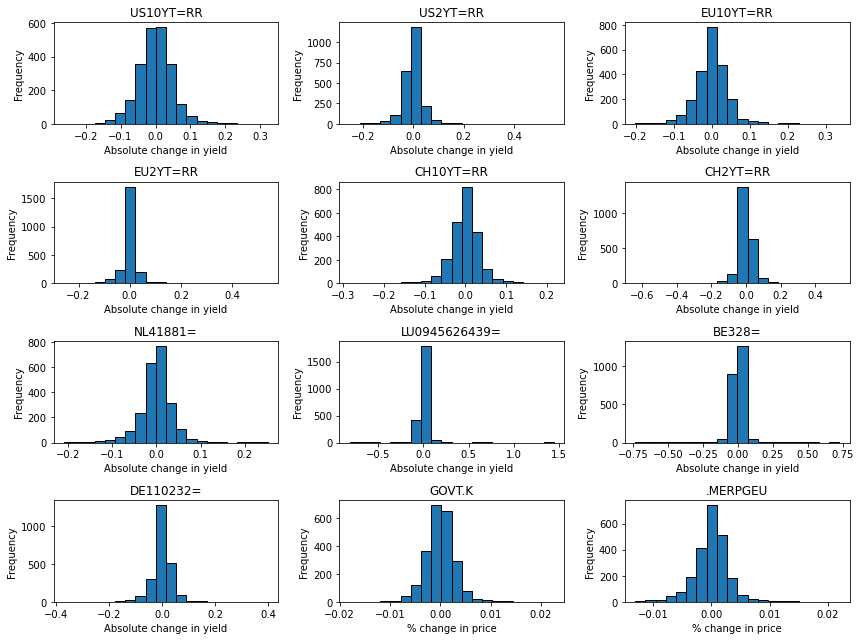

In [13]:
import math

n_cols = 3
n_rows = math.ceil(len(bond_cols + index_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 9))

for ax, col in zip(axes.flatten(), bond_cols + index_cols):
    ax.hist(df_returns_plot[col], bins=20, edgecolor='black')
    ax.set_title(col)
    ax.set_ylabel('Frequency')
    if col in bond_cols:
        ax.set_xlabel('Absolute change in yield')
    else:
        ax.set_xlabel('% change in price')

for ax in axes.flatten()[len(bond_cols + index_cols):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

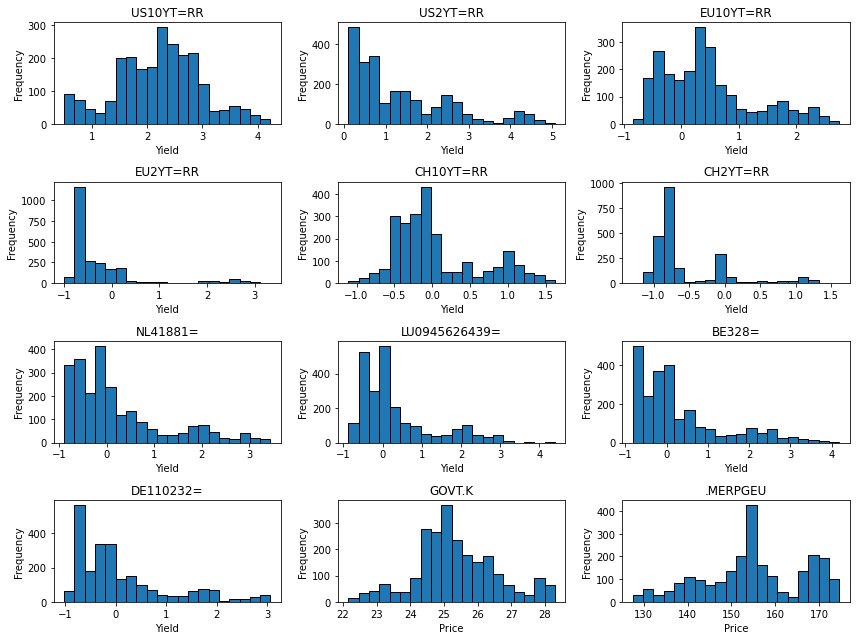

In [14]:
import matplotlib.pyplot as plt
import math


df_close_plot = df_close.drop(['Date'], axis=1, inplace=False)

n_cols = 3
n_rows = math.ceil(len(bond_cols + index_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 9))

for ax, col in zip(axes.flatten(), bond_cols + index_cols):
    ax.hist(df_close_plot[col], bins=20, edgecolor='black')
    ax.set_title(col)
    ax.set_ylabel('Frequency')
    if col in bond_cols:
        ax.set_xlabel('Yield')
    else:
        ax.set_xlabel('Price')

for ax in axes.flatten()[len(bond_cols + index_cols):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

###  Single event run

In [15]:
df_returns.rename(columns={'Date': 'date'}, inplace=True)
date_column = df_returns.pop('date')
df_returns.insert(0, 'date', date_column)
df_returns.to_csv('output_data.csv')

In [16]:
df_returns.reset_index(inplace=False)

df_returns.rename(columns={df_returns.columns[0]: 'date'}, inplace=True)

df_returns['date'] = pd.to_datetime(df_returns['date'], format='%d/%m/%Y')

df_returns.to_csv('output_data.csv', index=False)

US10YT=RR 
        AR  Std. E. AR     CAR  Std. E. CAR  T-stat  P-value
-2  0.020       0.021    0.02        0.021   0.954    0.341
-1 -0.029       0.021  -0.009        0.030  -0.296    0.767
0   0.019       0.021    0.01        0.037   0.272    0.786
1  -0.004       0.021   0.006        0.042   0.142    0.887
2  -0.035       0.021  -0.029        0.047  -0.623    0.534
3   0.016       0.021  -0.013        0.052  -0.258    0.797
4   0.006       0.021  -0.007        0.056  -0.133    0.894
5   0.020       0.021   0.012        0.060   0.205    0.838
6   0.009       0.021   0.022        0.063   0.343    0.732
7  -0.024       0.021  -0.002        0.067  -0.029    0.977
8  -0.012       0.021  -0.014        0.070  -0.196    0.845
9   0.032       0.021   0.019        0.073   0.255    0.799
10 -0.018       0.021     0.0        0.076   0.004    0.997 

US2YT=RR 
        AR  Std. E. AR     CAR  Std. E. CAR  T-stat  P-value
-2 -0.003       0.018  -0.003        0.018  -0.153    0.879
-1 -0.025      

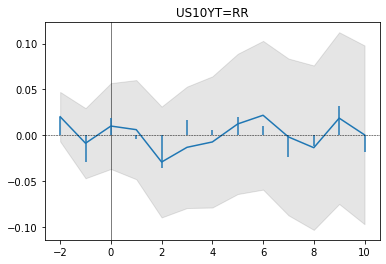

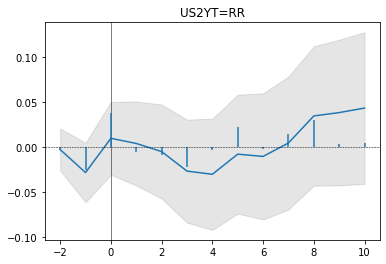

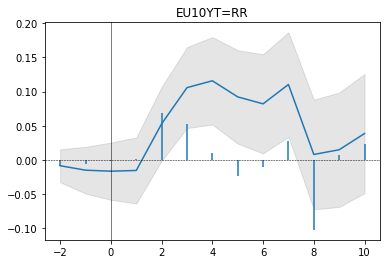

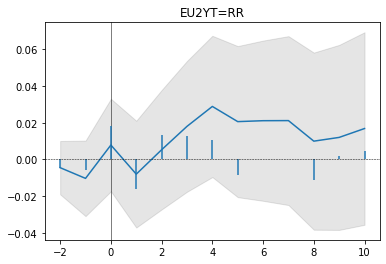

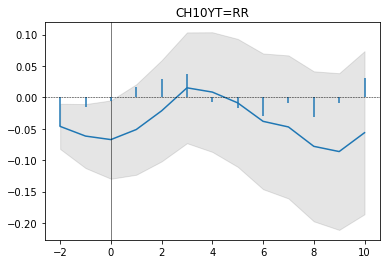

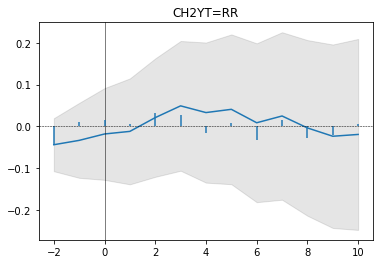

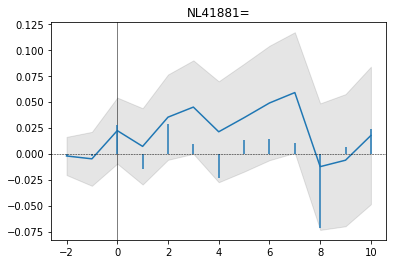

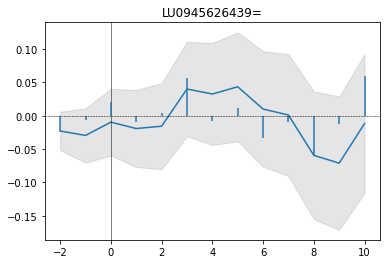

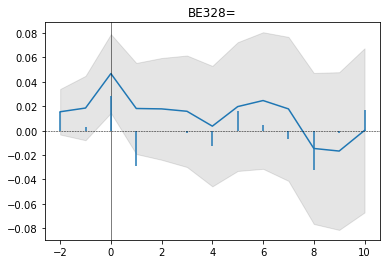

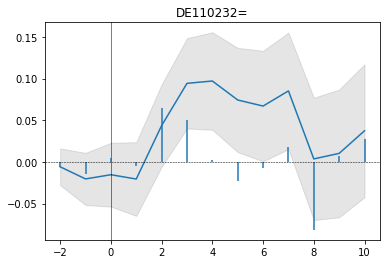

,AR,Std. E. AR,CAR,Std. E. CAR,T-stat,P-value
-2,-0.006,0.01722,-0.006,0.01722,-0.34,0.73
-1,-0.015,0.01722,-0.02,0.02435,-0.84,0.40
0,0.005,0.01722,-0.015,0.02982,-0.52,0.61
1,-0.005,0.01722,-0.021,0.03443,-0.60,0.55
2,0.064,0.01722,0.044,0.03850,1.13,0.26
3,0.051,0.01722,0.094 **,0.04217,2.24,0.03
4,0.003,0.01722,0.097 **,0.04555,2.13,0.03
5,-0.023,0.01722,0.074,0.04870,1.53,0.13
6,-0.007,0.01722,0.067,0.05165,1.30,0.20
7,0.018,0.01722,0.085,0.05444,1.56,0.12


In [17]:
es.Single.import_returns('output_data.csv', date_format='%Y-%m-%d')

source = [
    {
        "security_ticker": "US10YT=RR",
        "market_ticker": "GOVT.K",
        "event_date": '06/06/2015',
    },
    {
        "security_ticker": "US2YT=RR",
        "market_ticker": "GOVT.K",
        "event_date": '07/06/2015'
    },
    {
        "security_ticker": "EU10YT=RR",
        "market_ticker": ".MERPGEU",
        "event_date": '10/06/2015'
    },
    {
        "security_ticker": "EU2YT=RR",
        "market_ticker": ".MERPGEU",
        "event_date": '10/06/2015'
    },
    {
        "security_ticker": "CH10YT=RR",
        "market_ticker": ".MERPGEU",
        "event_date": '10/06/2015'
    },
    {
        "security_ticker": "CH2YT=RR",
        "market_ticker": ".MERPGEU",
        "event_date": '10/06/2015'
    },
    {
        "security_ticker": "NL41881=",
        "market_ticker": ".MERPGEU",
        "event_date": '10/06/2015'
    },
    {
        "security_ticker": "LU0945626439=",
        "market_ticker": ".MERPGEU",
        "event_date": '10/06/2015'
    },
     {
        "security_ticker": "BE328=",
        "market_ticker": ".MERPGEU",
        "event_date": '10/06/2015'
    },
     {
        "security_ticker": "DE110232=",
        "market_ticker": ".MERPGEU",
        "event_date": '10/06/2015'
    },
]


from datetime import datetime

for item in source:
    date = datetime.strptime(item['event_date'], '%d/%m/%Y')
    item['event_date'] = date.strftime('%Y-%m-%d')


results = []
results_full = []


for item in source:
    event = es.Single.market_model(
        security_ticker=item['security_ticker'],
        market_ticker=item['market_ticker'],  
        event_date=np.datetime64(item['event_date'], 'D'),
        event_window=(-2, 10),
        estimation_size=300,
        buffer_size=30
    )
    print(item['security_ticker'], "\n", event.results(asterisks=True), "\n")
    results.append(event.results(asterisks=False).tail(1))
    results_full.append(event) 


for item, event in zip(source, results_full):
    event.plot(AR=True, CI=True, confidence=0.9)  
    ax = plt.gca()  
    ax.set_title(item['security_ticker']) 
    plt.show()  



event.results(decimals=[3,5,3,5,2,2], asterisks=bool)

###  Multi-event run

In [19]:
from datetime import datetime


dates = ['18/09/2013', '16/10/2013', '30/10/2013', '18/12/2013', '29/01/2014', '04/03/2014',
         '19/03/2014', '30/04/2014', '18/06/2014', '30/07/2014', '17/09/2014', '29/10/2014',
         '17/12/2014', '28/01/2015', '18/03/2015', '29/04/2015', '17/06/2015', '29/07/2015',
         '17/09/2015', '28/10/2015', '17/12/2015', '28/01/2016', '17/03/2016', '28/04/2016',
         '16/06/2016', '28/07/2016', '22/09/2016', '03/11/2016', '15/12/2016', '01/02/2017',
         '16/03/2017', '04/05/2017', '15/06/2017', '27/07/2017', '21/09/2017', '02/11/2017',
         '14/12/2017', '01/02/2018', '22/03/2018', '03/05/2018', '14/06/2018', '02/08/2018',
         '27/09/2018', '09/11/2018', '20/12/2018', '31/01/2019', '21/03/2019', '02/05/2019',
         '20/06/2019', '19/09/2019', '31/10/2019', '12/12/2019', '30/01/2020', '04/03/2020',
         '30/04/2020', '11/06/2020', '30/07/2020', '17/09/2020', '06/11/2020', '17/12/2020',
         '28/01/2021', '18/03/2021', '29/04/2021', '17/06/2021', '29/07/2021', '23/09/2021',
         '04/11/2021', '16/12/2021', '27/01/2022', '17/03/2022', '05/05/2022', '16/06/2022',
         '28/07/2022', '22/09/2022', '03/11/2022', '15/12/2022', '02/02/2023', '23/03/2023', 
         '04/05/2023']

dates = [np.datetime64(datetime.strptime(date, '%d/%m/%Y')) for date in dates]


sec_market_pairs = [
    ('US10YT=RR', 'GOVT.K'),
    ('US2YT=RR', 'GOVT.K'),
    ('EU10YT=RR', '.MERPGEU'),
    ('EU2YT=RR', '.MERPGEU'),
    ('CH10YT=RR', '.MERPGEU'),
    ('CH2YT=RR', '.MERPGEU'),
    ('NL41881=', '.MERPGEU'),
    ('LU0945626439=', '.MERPGEU'),
    ('BE328=', '.MERPGEU'),
    ('DE110232=', '.MERPGEU'),
]

new_events_db = [{'security_ticker': sec_ticker, 
                  'market_ticker': market_ticker, 
                  'event_date': date} for sec_ticker, market_ticker in sec_market_pairs for date in dates]


###  1st Event window (-5, +10) with estimation size = 300

In [20]:
tickers = ['US10YT=RR', 'US2YT=RR', 'EU10YT=RR', 'EU2YT=RR', 'CH10YT=RR', 'CH2YT=RR', 'NL41881=', 'LU0945626439=', 'BE328=', 'DE110232=']

releases = dict()

for ticker in tickers:
    events = [event for event in new_events_db if event['security_ticker'] == ticker]
    
    releases[ticker] = es.Multiple.from_list(
        events,
        es.Single.market_model,
        event_window=(-5, +10),
        estimation_size=300,
        buffer_size=30
    )

2023-06-11 14:16:45,469 P[13484] [MainThread 23088]  14 events have not been processed due to data issues.
Tips: Get more details on errors by calling Multiple.error_report() method or by exploring Multiple.errors class variable.
2023-06-11 14:16:45,493 P[13484] [MainThread 23088]  14 events have not been processed due to data issues.
Tips: Get more details on errors by calling Multiple.error_report() method or by exploring Multiple.errors class variable.
2023-06-11 14:16:45,517 P[13484] [MainThread 23088]  14 events have not been processed due to data issues.
Tips: Get more details on errors by calling Multiple.error_report() method or by exploring Multiple.errors class variable.
2023-06-11 14:16:45,540 P[13484] [MainThread 23088]  14 events have not been processed due to data issues.
Tips: Get more details on errors by calling Multiple.error_report() method or by exploring Multiple.errors class variable.
2023-06-11 14:16:45,564 P[13484] [MainThread 23088]  14 events have not been pro

In [21]:
for ticker, release in releases.items():
    print(f"Error report for ticker: {ticker}")
    print(release.error_report())
    print("\n")


Error report for ticker: US10YT=RR
Error Report

14 errors due to data unavailability.
The respective events was not processed and thus removed from the sample.
It does not affect the computation of other events.

Help 1: Check if the company was quoted at this date, 
Help 2: For event study modelised used Fama-French models,
        check if the Fama-French dataset imported is up-to-date.
Tips:   Re-import all parameters and re-run the event study analysis.

Details
(You can find more details on errors in the documentation.)

Error            Date                       Parameters                                     
---------------- -------------------------- -------------------------------------------------
DataMissingError 2013-09-18T00:00:00.000000 security_ticker: US10YT=RR; market_ticker: GOVT.K
Description: Some data are missing for (US10YT=RR) in 'returns''.

DataMissingError 2013-10-16T00:00:00.000000 security_ticker: US10YT=RR; market_ticker: GOVT.K
Description: Some data are

US10YT=RR


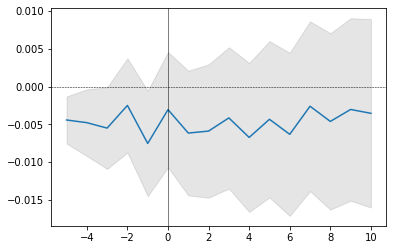

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-5,-0.004,0.002,-0.004 *,0.002,-1.814,0.070
-4,-0.000,0.002,-0.005,0.003,-1.385,0.166
-3,-0.001,0.002,-0.005,0.004,-1.302,0.193
-2,0.003,0.002,-0.002,0.005,-0.510,0.610
-1,-0.005,0.002,-0.008,0.005,-1.382,0.167
0,0.004,0.002,-0.003,0.006,-0.510,0.610
1,-0.003,0.002,-0.006,0.006,-0.954,0.340
2,0.000,0.002,-0.006,0.007,-0.854,0.393
3,0.002,0.002,-0.004,0.007,-0.567,0.571
4,-0.003,0.002,-0.007,0.008,-0.874,0.382


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-5,-0.004,0.000,0.864,0.113,-0.046,-0.013,-0.003,0.004,0.040
-4,-0.005,0.000,2.419,0.415,-0.045,-0.013,-0.004,0.005,0.057
-3,-0.005,0.000,1.174,-0.768,-0.070,-0.016,-0.003,0.008,0.035
-2,-0.002,0.001,4.437,-0.269,-0.114,-0.016,0.004,0.011,0.102
-1,-0.008,0.001,4.965,-0.796,-0.144,-0.023,-0.000,0.008,0.103
0,-0.003,0.001,2.304,-0.276,-0.109,-0.018,-0.005,0.014,0.093
1,-0.006,0.001,2.612,0.309,-0.091,-0.026,-0.005,0.012,0.123
2,-0.006,0.001,2.284,-0.976,-0.148,-0.027,-0.003,0.014,0.066
3,-0.004,0.001,2.361,-0.479,-0.138,-0.020,-0.004,0.020,0.116
4,-0.007,0.001,0.338,-0.074,-0.093,-0.026,-0.004,0.018,0.091


US2YT=RR


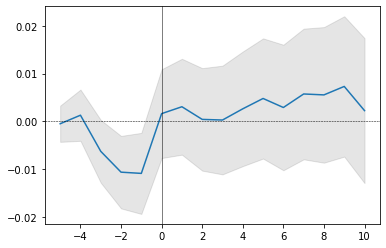

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-5,-0.001,0.003,-0.001,0.003,-0.172,0.863
-4,0.002,0.003,0.001,0.004,0.305,0.760
-3,-0.008,0.003,-0.006,0.005,-1.225,0.220
-2,-0.004,0.003,-0.011 *,0.006,-1.798,0.072
-1,-0.000,0.003,-0.011,0.007,-1.647,0.100
0,0.013,0.003,0.002,0.007,0.221,0.825
1,0.001,0.003,0.003,0.008,0.389,0.697
2,-0.003,0.003,0.0,0.008,0.048,0.962
3,-0.000,0.003,0.0,0.009,0.030,0.976
4,0.002,0.003,0.003,0.009,0.279,0.780


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-5,-0.001,0.001,1.525,0.589,-0.067,-0.017,-0.005,0.014,0.083
-4,0.001,0.002,7.942,-0.416,-0.217,-0.018,-0.003,0.015,0.171
-3,-0.006,0.004,14.878,-2.321,-0.351,-0.022,-0.005,0.013,0.177
-2,-0.011,0.006,19.282,-2.463,-0.464,-0.024,-0.010,0.003,0.261
-1,-0.011,0.006,8.048,-1.082,-0.365,-0.040,-0.014,0.021,0.245
0,0.002,0.009,3.547,0.758,-0.268,-0.042,-0.005,0.041,0.362
1,0.003,0.008,2.565,0.332,-0.245,-0.040,-0.001,0.038,0.322
2,0.000,0.008,3.166,-0.935,-0.358,-0.042,0.004,0.044,0.221
3,0.000,0.008,3.466,-0.536,-0.364,-0.046,0.001,0.039,0.234
4,0.003,0.009,2.909,-0.013,-0.337,-0.051,0.005,0.037,0.298


EU10YT=RR


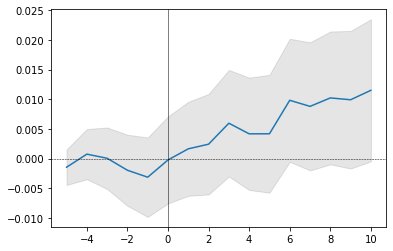

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-5,-0.001,0.002,-0.001,0.002,-0.620,0.535
-4,0.002,0.002,0.001,0.003,0.229,0.819
-3,-0.001,0.002,0.0,0.004,0.015,0.988
-2,-0.002,0.002,-0.002,0.005,-0.419,0.675
-1,-0.001,0.002,-0.003,0.005,-0.599,0.549
0,0.003,0.002,-0.0,0.006,-0.039,0.969
1,0.002,0.002,0.002,0.006,0.267,0.790
2,0.001,0.002,0.002,0.007,0.368,0.713
3,0.004,0.002,0.006,0.007,0.852,0.394
4,-0.002,0.002,0.004,0.007,0.566,0.572


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-5,-0.001,0.000,0.648,-0.411,-0.044,-0.010,0.001,0.007,0.044
-4,0.001,0.001,0.569,0.153,-0.059,-0.014,0.001,0.011,0.076
-3,0.000,0.001,0.500,0.223,-0.078,-0.017,-0.002,0.015,0.085
-2,-0.002,0.001,1.794,0.567,-0.083,-0.023,-0.003,0.014,0.121
-1,-0.003,0.001,2.630,1.012,-0.076,-0.026,-0.001,0.009,0.131
0,-0.000,0.001,1.044,0.578,-0.085,-0.020,-0.007,0.019,0.107
1,0.002,0.001,0.571,0.259,-0.084,-0.017,-0.002,0.021,0.101
2,0.002,0.002,1.731,0.628,-0.085,-0.018,0.002,0.021,0.125
3,0.006,0.002,5.456,1.595,-0.094,-0.021,0.005,0.021,0.214
4,0.004,0.002,5.487,1.487,-0.109,-0.024,0.000,0.023,0.214


EU2YT=RR


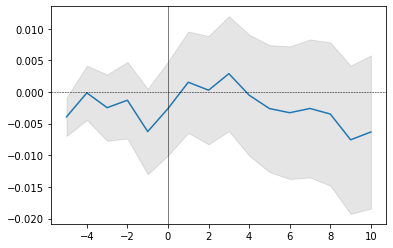

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-5,-0.004,0.002,-0.004 *,0.002,-1.662,0.097
-4,0.004,0.002,-0.0,0.003,-0.040,0.968
-3,-0.002,0.002,-0.002,0.004,-0.605,0.545
-2,0.001,0.002,-0.001,0.005,-0.275,0.783
-1,-0.005,0.002,-0.006,0.005,-1.184,0.236
0,0.004,0.002,-0.003,0.006,-0.451,0.652
1,0.004,0.002,0.002,0.006,0.248,0.804
2,-0.001,0.002,0.0,0.007,0.043,0.966
3,0.003,0.002,0.003,0.007,0.410,0.682
4,-0.003,0.002,-0.0,0.007,-0.067,0.947


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-5,-0.004,0.001,3.576,-1.248,-0.119,-0.009,-0.001,0.009,0.072
-4,-0.000,0.002,2.148,-0.328,-0.141,-0.017,0.000,0.014,0.110
-3,-0.002,0.002,4.947,-1.416,-0.220,-0.018,0.002,0.017,0.102
-2,-0.001,0.003,4.590,-1.125,-0.234,-0.020,0.001,0.026,0.134
-1,-0.006,0.003,2.429,-1.130,-0.199,-0.027,0.002,0.022,0.120
0,-0.003,0.005,3.497,-0.686,-0.241,-0.025,0.004,0.027,0.207
1,0.002,0.005,4.205,-1.024,-0.263,-0.013,0.008,0.031,0.190
2,0.000,0.004,2.843,-0.584,-0.234,-0.017,0.006,0.031,0.176
3,0.003,0.005,3.601,0.387,-0.192,-0.014,0.006,0.030,0.286
4,-0.000,0.005,2.655,0.337,-0.196,-0.027,0.006,0.029,0.247


CH10YT=RR


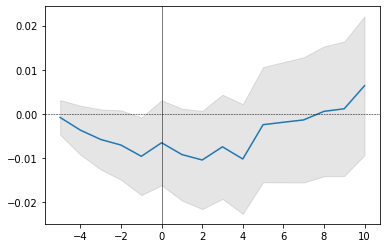

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-5,-0.001,0.003,-0.001,0.003,-0.267,0.790
-4,-0.003,0.003,-0.004,0.004,-0.852,0.394
-3,-0.002,0.003,-0.006,0.005,-1.091,0.275
-2,-0.001,0.003,-0.007,0.006,-1.152,0.249
-1,-0.003,0.003,-0.01,0.007,-1.401,0.161
0,0.003,0.003,-0.007,0.008,-0.871,0.384
1,-0.003,0.003,-0.009,0.008,-1.136,0.256
2,-0.001,0.003,-0.01,0.009,-1.204,0.229
3,0.003,0.003,-0.007,0.009,-0.811,0.418
4,-0.003,0.003,-0.01,0.010,-1.054,0.292


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-5,-0.001,0.001,2.898,0.774,-0.057,-0.014,-0.001,0.009,0.090
-4,-0.004,0.001,-0.170,-0.311,-0.085,-0.021,-0.001,0.017,0.061
-3,-0.006,0.001,-0.481,-0.392,-0.093,-0.035,-0.001,0.020,0.061
-2,-0.007,0.002,-0.724,0.247,-0.079,-0.043,-0.010,0.020,0.076
-1,-0.010,0.002,0.231,-0.070,-0.138,-0.037,-0.007,0.019,0.094
0,-0.007,0.003,0.473,-0.347,-0.154,-0.030,-0.007,0.019,0.108
1,-0.009,0.003,0.755,-0.629,-0.180,-0.043,-0.004,0.021,0.087
2,-0.010,0.003,1.250,-0.693,-0.210,-0.040,-0.007,0.023,0.093
3,-0.007,0.003,2.144,-0.625,-0.228,-0.039,-0.004,0.024,0.126
4,-0.010,0.004,0.805,-0.511,-0.218,-0.052,-0.007,0.033,0.112


CH2YT=RR


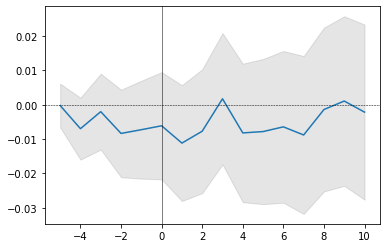

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-5,-0.000,0.005,-0.0,0.005,-0.051,0.960
-4,-0.007,0.005,-0.007,0.007,-0.994,0.320
-3,0.005,0.005,-0.002,0.009,-0.236,0.813
-2,-0.006,0.005,-0.008,0.010,-0.842,0.400
-1,0.001,0.005,-0.007,0.011,-0.655,0.512
0,0.001,0.005,-0.006,0.012,-0.505,0.614
1,-0.005,0.005,-0.011,0.013,-0.850,0.395
2,0.003,0.005,-0.008,0.014,-0.549,0.583
3,0.009,0.005,0.002,0.015,0.115,0.908
4,-0.010,0.005,-0.008,0.016,-0.523,0.601


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-5,-0.000,0.001,5.437,0.000,-0.111,-0.011,0.000,0.011,0.117
-4,-0.007,0.003,9.368,-2.199,-0.286,-0.024,0.001,0.015,0.107
-3,-0.002,0.005,8.393,0.907,-0.244,-0.022,-0.007,0.015,0.346
-2,-0.008,0.004,3.816,-1.222,-0.245,-0.028,-0.007,0.022,0.139
-1,-0.007,0.003,2.062,-0.530,-0.220,-0.034,-0.004,0.018,0.144
0,-0.006,0.006,7.919,-1.813,-0.377,-0.029,-0.005,0.024,0.159
1,-0.011,0.005,6.196,-1.316,-0.355,-0.033,-0.004,0.022,0.178
2,-0.008,0.007,2.781,-0.391,-0.312,-0.031,-0.004,0.032,0.231
3,0.002,0.007,5.627,0.188,-0.314,-0.028,0.008,0.031,0.346
4,-0.008,0.010,9.094,0.643,-0.403,-0.046,-0.005,0.032,0.465


NL41881=


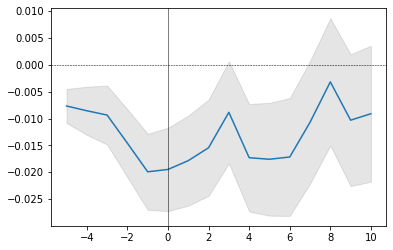

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-5,-0.008,0.002,-0.008 ***,0.002,-3.099,0.002
-4,-0.001,0.002,-0.009 **,0.003,-2.445,0.015
-3,-0.001,0.002,-0.009 **,0.004,-2.184,0.029
-2,-0.005,0.002,-0.015 ***,0.005,-2.951,0.003
-1,-0.005,0.002,-0.02 ***,0.006,-3.603,0.000
0,0.000,0.002,-0.019 ***,0.006,-3.217,0.001
1,0.002,0.002,-0.018 ***,0.007,-2.727,0.006
2,0.002,0.002,-0.015 **,0.007,-2.208,0.027
3,0.007,0.002,-0.009,0.007,-1.191,0.234
4,-0.008,0.002,-0.017 **,0.008,-2.212,0.027


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-5,-0.008,0.002,8.621,-0.901,-0.187,-0.014,-0.003,0.005,0.145
-4,-0.009,0.002,3.260,-1.066,-0.169,-0.026,-0.005,0.014,0.115
-3,-0.009,0.003,4.204,-0.616,-0.200,-0.024,-0.001,0.017,0.197
-2,-0.015,0.004,6.606,-2.100,-0.289,-0.024,-0.003,0.011,0.122
-1,-0.020,0.005,10.414,-2.892,-0.349,-0.030,-0.007,0.012,0.110
0,-0.019,0.007,10.268,-2.594,-0.434,-0.029,-0.003,0.018,0.171
1,-0.018,0.006,10.693,-2.725,-0.414,-0.032,-0.006,0.022,0.101
2,-0.015,0.006,12.490,-2.886,-0.447,-0.030,-0.004,0.022,0.113
3,-0.009,0.007,5.643,-1.304,-0.364,-0.033,-0.002,0.021,0.217
4,-0.017,0.007,6.820,-2.229,-0.401,-0.030,0.002,0.025,0.109


LU0945626439=


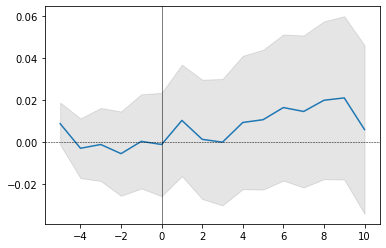

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-5,0.009,0.008,0.009,0.008,1.111,0.267
-4,-0.012,0.008,-0.003,0.011,-0.273,0.785
-3,0.002,0.008,-0.001,0.014,-0.090,0.929
-2,-0.004,0.008,-0.006,0.016,-0.356,0.722
-1,0.006,0.008,0.0,0.017,0.015,0.988
0,-0.001,0.008,-0.001,0.019,-0.064,0.949
1,0.011,0.008,0.01,0.021,0.494,0.621
2,-0.009,0.008,0.001,0.022,0.056,0.956
3,-0.001,0.008,-0.0,0.023,-0.005,0.996
4,0.009,0.008,0.009,0.025,0.374,0.708


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-5,0.009,0.002,2.001,1.002,-0.076,-0.011,0.002,0.020,0.152
-4,-0.003,0.002,3.806,-0.090,-0.158,-0.019,0.000,0.016,0.164
-3,-0.001,0.005,2.643,0.258,-0.218,-0.019,0.001,0.013,0.210
-2,-0.006,0.006,8.732,-1.026,-0.381,-0.030,-0.002,0.012,0.230
-1,0.000,0.005,3.187,0.198,-0.259,-0.025,-0.000,0.018,0.236
0,-0.001,0.006,7.171,-0.292,-0.359,-0.031,-0.000,0.023,0.287
1,0.010,0.015,14.581,2.575,-0.353,-0.026,-0.003,0.027,0.690
2,0.001,0.006,2.828,0.442,-0.245,-0.037,0.000,0.030,0.270
3,-0.000,0.006,1.468,-0.095,-0.237,-0.034,-0.001,0.030,0.211
4,0.009,0.011,17.367,2.923,-0.256,-0.033,0.005,0.038,0.620


BE328=


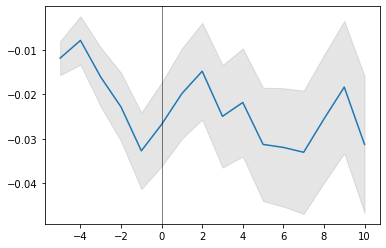

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-5,-0.012,0.003,-0.012 ***,0.003,-3.918,0.000
-4,0.004,0.003,-0.008 *,0.004,-1.833,0.067
-3,-0.008,0.003,-0.016 ***,0.005,-3.083,0.002
-2,-0.007,0.003,-0.023 ***,0.006,-3.792,0.000
-1,-0.010,0.003,-0.033 ***,0.007,-4.862,0.000
0,0.006,0.003,-0.027 ***,0.007,-3.628,0.000
1,0.007,0.003,-0.02 **,0.008,-2.485,0.013
2,0.005,0.003,-0.015 *,0.009,-1.733,0.083
3,-0.010,0.003,-0.025 ***,0.009,-2.761,0.006
4,0.003,0.003,-0.022 **,0.010,-2.291,0.022


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-5,-0.012,0.003,17.234,-3.904,-0.289,-0.013,-0.002,0.009,0.061
-4,-0.008,0.001,4.976,-1.667,-0.171,-0.022,-0.001,0.012,0.069
-3,-0.016,0.003,10.412,-2.858,-0.318,-0.024,-0.000,0.014,0.064
-2,-0.023,0.005,9.079,-2.766,-0.375,-0.025,-0.006,0.009,0.062
-1,-0.033,0.009,12.701,-3.323,-0.538,-0.027,-0.012,0.010,0.073
0,-0.027,0.008,9.669,-2.752,-0.475,-0.027,-0.010,0.009,0.100
1,-0.020,0.007,6.141,-1.785,-0.381,-0.029,-0.010,0.019,0.201
2,-0.015,0.006,5.226,-1.293,-0.308,-0.031,-0.004,0.020,0.226
3,-0.025,0.013,10.860,-2.536,-0.611,-0.031,-0.006,0.021,0.278
4,-0.022,0.008,4.506,-1.325,-0.354,-0.036,-0.008,0.020,0.239


DE110232=


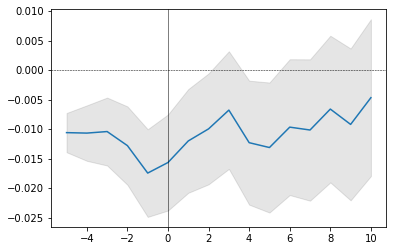

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-5,-0.011,0.003,-0.011 ***,0.003,-4.083,0.000
-4,-0.000,0.003,-0.011 ***,0.004,-2.908,0.004
-3,0.000,0.003,-0.01 **,0.004,-2.316,0.021
-2,-0.002,0.003,-0.013 **,0.005,-2.466,0.014
-1,-0.005,0.003,-0.017 ***,0.006,-3.008,0.003
0,0.002,0.003,-0.016 **,0.006,-2.464,0.014
1,0.004,0.003,-0.012 *,0.007,-1.748,0.080
2,0.002,0.003,-0.01,0.007,-1.356,0.175
3,0.003,0.003,-0.007,0.008,-0.870,0.384
4,-0.006,0.003,-0.012,0.008,-1.499,0.134


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-5,-0.011,0.001,2.875,-1.185,-0.116,-0.017,-0.002,0.003,0.072
-4,-0.011,0.002,4.231,-1.319,-0.201,-0.025,-0.000,0.012,0.103
-3,-0.010,0.003,6.118,-1.686,-0.248,-0.026,-0.004,0.014,0.109
-2,-0.013,0.004,5.042,-1.287,-0.288,-0.033,-0.006,0.015,0.158
-1,-0.017,0.006,9.206,-2.192,-0.393,-0.033,-0.007,0.010,0.159
0,-0.016,0.008,12.414,-2.885,-0.487,-0.036,-0.003,0.015,0.137
1,-0.012,0.009,10.874,-2.436,-0.510,-0.032,-0.002,0.029,0.205
2,-0.010,0.010,10.042,-2.118,-0.521,-0.033,-0.002,0.032,0.279
3,-0.007,0.010,6.385,-1.505,-0.457,-0.032,0.006,0.024,0.241
4,-0.012,0.009,5.973,-1.512,-0.444,-0.030,0.005,0.030,0.228


In [22]:
results_dfs1 = {}

for ticker, event in releases.items():
    print(ticker)
    event.plot()
    plt.show()
    display(event.results())
    display(event.get_CAR_dist())
    results_df1 = pd.DataFrame(event.results())
    results_dfs1[ticker] = results_df1
    event.to_excel(f'results_{ticker}.xlsx')

In [23]:
import time
with pd.ExcelWriter('combined_results1.xlsx') as writer:
    for ticker in tickers:
        xls = pd.ExcelFile(f'results_{ticker}.xlsx')
        for sheet_name in xls.sheet_names:
            df = pd.read_excel(xls, sheet_name=sheet_name)
            df.to_excel(writer, sheet_name=f'{ticker}_{sheet_name}')  # unique name for each sheet
        xls.close()

In [24]:
import os
for ticker in tickers:
    os.remove(f'results_{ticker}.xlsx')

In [25]:
connection = sqlite3.connect("Eventstudy.db")
cursor = connection.cursor()
engine = sqlalchemy.create_engine("sqlite:///Eventstudy.db")

for ticker, df in results_dfs1.items():
    df.to_sql(f'results1_{ticker}', engine, if_exists='replace')

###  2nd Event window (-2, +5) with estimation size = 100

In [26]:
releases = dict()

for ticker in tickers:
    events = [event for event in new_events_db if event['security_ticker'] == ticker]
    
    releases[ticker] = es.Multiple.from_list(
        events,
        es.Single.market_model,
        event_window=(-2, +5),
        estimation_size=100,
        buffer_size=20
    )

2023-06-11 14:17:00,504 P[13484] [MainThread 23088]  7 events have not been processed due to data issues.
Tips: Get more details on errors by calling Multiple.error_report() method or by exploring Multiple.errors class variable.
2023-06-11 14:17:00,529 P[13484] [MainThread 23088]  7 events have not been processed due to data issues.
Tips: Get more details on errors by calling Multiple.error_report() method or by exploring Multiple.errors class variable.
2023-06-11 14:17:00,553 P[13484] [MainThread 23088]  7 events have not been processed due to data issues.
Tips: Get more details on errors by calling Multiple.error_report() method or by exploring Multiple.errors class variable.
2023-06-11 14:17:00,579 P[13484] [MainThread 23088]  7 events have not been processed due to data issues.
Tips: Get more details on errors by calling Multiple.error_report() method or by exploring Multiple.errors class variable.
2023-06-11 14:17:00,602 P[13484] [MainThread 23088]  7 events have not been processe

In [27]:
for ticker, release in releases.items():
    print(f"Error report for ticker: {ticker}")
    print(release.error_report())
    print("\n")

Error report for ticker: US10YT=RR
Error Report

7 errors due to data unavailability.
The respective events was not processed and thus removed from the sample.
It does not affect the computation of other events.

Help 1: Check if the company was quoted at this date, 
Help 2: For event study modelised used Fama-French models,
        check if the Fama-French dataset imported is up-to-date.
Tips:   Re-import all parameters and re-run the event study analysis.

Details
(You can find more details on errors in the documentation.)

Error            Date                       Parameters                                     
---------------- -------------------------- -------------------------------------------------
DataMissingError 2013-09-18T00:00:00.000000 security_ticker: US10YT=RR; market_ticker: GOVT.K
Description: Some data are missing for (US10YT=RR) in 'returns''.

DataMissingError 2013-10-16T00:00:00.000000 security_ticker: US10YT=RR; market_ticker: GOVT.K
Description: Some data are 

US10YT=RR


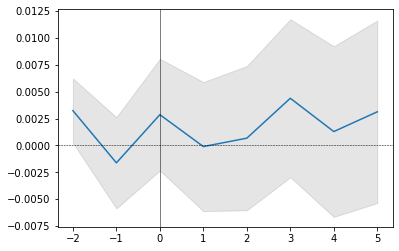

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-2,0.003,0.002,0.003,0.002,1.384,0.166
-1,-0.005,0.002,-0.002,0.003,-0.487,0.626
0,0.004,0.002,0.003,0.004,0.707,0.480
1,-0.003,0.002,-0.0,0.005,-0.022,0.983
2,0.001,0.002,0.001,0.005,0.130,0.896
3,0.004,0.002,0.004,0.006,0.766,0.444
4,-0.003,0.002,0.001,0.006,0.209,0.834
5,0.002,0.002,0.003,0.007,0.473,0.636


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-2,0.003,0.000,3.322,1.145,-0.045,-0.008,0.001,0.012,0.079
-1,-0.002,0.001,2.331,0.347,-0.071,-0.011,0.000,0.009,0.082
0,0.003,0.001,0.548,0.314,-0.055,-0.012,0.002,0.015,0.069
1,-0.000,0.001,2.677,0.350,-0.072,-0.012,-0.002,0.014,0.099
2,0.001,0.001,0.939,-0.245,-0.083,-0.014,0.001,0.019,0.084
3,0.004,0.001,0.827,0.063,-0.064,-0.015,0.006,0.021,0.089
4,0.001,0.001,1.010,-0.330,-0.081,-0.013,0.000,0.019,0.074
5,0.003,0.001,1.714,0.303,-0.086,-0.016,0.004,0.017,0.101


US2YT=RR


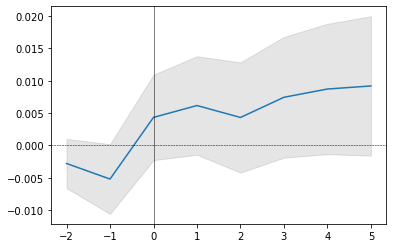

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-2,-0.003,0.003,-0.003,0.003,-0.937,0.349
-1,-0.002,0.003,-0.005,0.004,-1.236,0.216
0,0.010,0.003,0.004,0.005,0.842,0.400
1,0.002,0.003,0.006,0.006,1.038,0.299
2,-0.002,0.003,0.004,0.007,0.651,0.515
3,0.003,0.003,0.007,0.007,1.022,0.307
4,0.001,0.003,0.009,0.008,1.109,0.268
5,0.000,0.003,0.009,0.008,1.094,0.274


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-2,-0.003,0.001,5.527,-0.936,-0.145,-0.013,-0.005,0.009,0.082
-1,-0.005,0.001,0.716,-0.285,-0.109,-0.026,-0.003,0.016,0.080
0,0.004,0.003,3.506,-0.197,-0.213,-0.024,0.002,0.033,0.184
1,0.006,0.003,1.724,-0.006,-0.193,-0.023,0.007,0.034,0.156
2,0.004,0.004,1.808,-0.005,-0.182,-0.024,0.003,0.038,0.177
3,0.007,0.004,2.327,0.462,-0.165,-0.028,0.005,0.043,0.241
4,0.009,0.004,2.501,0.611,-0.159,-0.035,0.008,0.041,0.275
5,0.009,0.005,1.607,0.644,-0.177,-0.029,0.005,0.047,0.240


EU10YT=RR


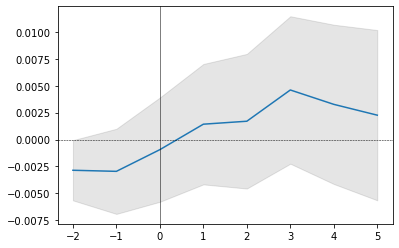

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-2,-0.003,0.002,-0.003,0.002,-1.308,0.191
-1,-0.000,0.002,-0.003,0.003,-0.958,0.338
0,0.002,0.002,-0.001,0.004,-0.249,0.804
1,0.002,0.002,0.001,0.004,0.327,0.744
2,0.000,0.002,0.002,0.005,0.348,0.728
3,0.003,0.002,0.005,0.005,0.861,0.389
4,-0.001,0.002,0.003,0.006,0.566,0.571
5,-0.001,0.002,0.002,0.006,0.367,0.714


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-2,-0.003,0.000,1.140,0.048,-0.040,-0.012,-0.003,0.007,0.049
-1,-0.003,0.000,1.019,0.201,-0.052,-0.013,-0.003,0.010,0.061
0,-0.001,0.001,1.256,0.159,-0.080,-0.019,-0.000,0.015,0.089
1,0.001,0.001,1.092,0.060,-0.088,-0.016,0.001,0.022,0.091
2,0.002,0.001,0.206,0.192,-0.085,-0.018,-0.002,0.021,0.092
3,0.005,0.002,1.169,0.768,-0.080,-0.018,0.001,0.020,0.135
4,0.003,0.002,1.573,0.438,-0.114,-0.021,-0.003,0.025,0.137
5,0.002,0.002,-0.047,0.295,-0.091,-0.024,-0.007,0.032,0.117


EU2YT=RR


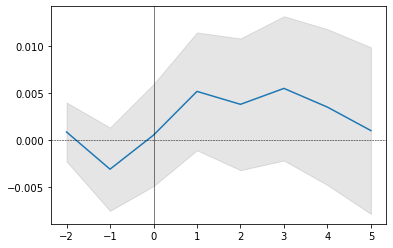

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-2,0.001,0.002,0.001,0.002,0.345,0.730
-1,-0.004,0.002,-0.003,0.003,-0.901,0.367
0,0.004,0.002,0.001,0.004,0.120,0.905
1,0.005,0.002,0.005,0.005,1.055,0.291
2,-0.001,0.002,0.004,0.005,0.692,0.489
3,0.002,0.002,0.005,0.006,0.915,0.360
4,-0.002,0.002,0.003,0.006,0.539,0.590
5,-0.002,0.002,0.001,0.007,0.143,0.886


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-2,0.001,0.001,18.320,-2.797,-0.148,-0.008,0.001,0.009,0.054
-1,-0.003,0.001,16.257,-2.539,-0.217,-0.014,0.000,0.012,0.110
0,0.001,0.001,1.750,-0.649,-0.101,-0.014,0.003,0.017,0.078
1,0.005,0.001,1.004,-0.115,-0.106,-0.010,0.002,0.022,0.100
2,0.004,0.002,1.142,-0.328,-0.129,-0.013,0.006,0.025,0.113
3,0.005,0.003,2.967,0.278,-0.167,-0.016,0.006,0.024,0.216
4,0.003,0.003,1.808,-0.436,-0.168,-0.018,0.007,0.031,0.176
5,0.001,0.005,2.713,-0.691,-0.226,-0.019,0.006,0.025,0.187


CH10YT=RR


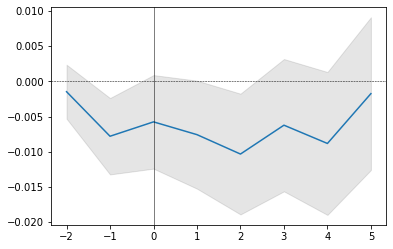

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-2,-0.001,0.003,-0.001,0.003,-0.489,0.625
-1,-0.006,0.003,-0.008 *,0.004,-1.841,0.066
0,0.002,0.003,-0.006,0.005,-1.109,0.267
1,-0.002,0.003,-0.008,0.006,-1.264,0.206
2,-0.003,0.003,-0.01,0.007,-1.542,0.123
3,0.004,0.003,-0.006,0.007,-0.849,0.396
4,-0.003,0.003,-0.009,0.008,-1.113,0.266
5,0.007,0.003,-0.002,0.008,-0.205,0.837


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-2,-0.001,0.001,1.140,-0.406,-0.074,-0.012,-0.000,0.014,0.065
-1,-0.008,0.002,11.711,-2.560,-0.259,-0.020,-0.001,0.012,0.074
0,-0.006,0.003,5.144,-1.450,-0.254,-0.025,0.003,0.022,0.135
1,-0.008,0.003,4.320,-1.397,-0.230,-0.028,0.001,0.027,0.141
2,-0.010,0.004,4.122,-1.132,-0.245,-0.033,-0.010,0.024,0.161
3,-0.006,0.003,3.737,-1.195,-0.257,-0.031,-0.004,0.028,0.112
4,-0.009,0.003,2.870,-1.188,-0.249,-0.043,0.000,0.028,0.088
5,-0.002,0.004,1.806,-1.018,-0.226,-0.027,0.003,0.040,0.111


CH2YT=RR


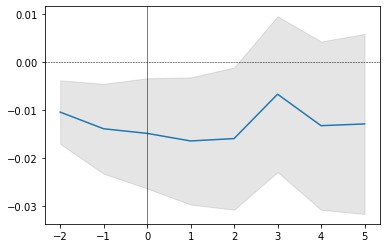

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-2,-0.010,0.005,-0.01 **,0.005,-2.019,0.044
-1,-0.003,0.005,-0.014 *,0.007,-1.902,0.057
0,-0.001,0.005,-0.015 *,0.009,-1.660,0.097
1,-0.002,0.005,-0.016,0.010,-1.591,0.112
2,0.000,0.005,-0.016,0.012,-1.380,0.168
3,0.009,0.005,-0.007,0.013,-0.529,0.597
4,-0.007,0.005,-0.013,0.014,-0.970,0.332
5,0.000,0.005,-0.013,0.015,-0.882,0.378


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-2,-0.010,0.006,34.534,-5.290,-0.573,-0.013,0.003,0.018,0.103
-1,-0.014,0.012,16.793,-3.293,-0.601,-0.019,0.001,0.025,0.314
0,-0.015,0.015,21.165,-4.285,-0.734,-0.021,0.004,0.024,0.153
1,-0.016,0.015,18.230,-3.877,-0.702,-0.034,-0.002,0.024,0.143
2,-0.016,0.016,15.264,-3.464,-0.673,-0.029,0.000,0.022,0.206
3,-0.007,0.016,14.464,-2.987,-0.687,-0.024,0.007,0.037,0.342
4,-0.013,0.017,16.802,-2.672,-0.777,-0.035,0.005,0.034,0.448
5,-0.013,0.019,12.838,-1.924,-0.742,-0.036,0.001,0.027,0.489


NL41881=


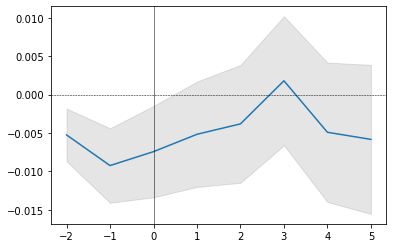

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-2,-0.005,0.003,-0.005 *,0.003,-1.962,0.050
-1,-0.004,0.003,-0.009 **,0.004,-2.441,0.015
0,0.002,0.003,-0.007,0.005,-1.603,0.109
1,0.002,0.003,-0.005,0.005,-0.965,0.334
2,0.001,0.003,-0.004,0.006,-0.637,0.524
3,0.006,0.003,0.002,0.007,0.274,0.784
4,-0.007,0.003,-0.005,0.007,-0.693,0.488
5,-0.001,0.003,-0.006,0.008,-0.771,0.441


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-2,-0.005,0.001,5.438,-1.505,-0.107,-0.012,-0.004,0.004,0.053
-1,-0.009,0.001,7.191,-1.553,-0.164,-0.019,-0.008,0.004,0.108
0,-0.007,0.004,8.688,-0.314,-0.239,-0.023,-0.007,0.015,0.260
1,-0.005,0.004,14.475,-2.968,-0.366,-0.019,-0.004,0.021,0.108
2,-0.004,0.004,11.025,-2.600,-0.320,-0.015,-0.000,0.018,0.113
3,0.002,0.004,8.435,-0.443,-0.304,-0.017,0.001,0.020,0.267
4,-0.005,0.003,14.839,-2.875,-0.342,-0.022,-0.001,0.021,0.107
5,-0.006,0.004,10.349,-2.052,-0.333,-0.021,-0.004,0.023,0.145


LU0945626439=


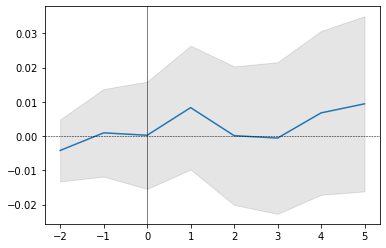

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-2,-0.004,0.007,-0.004,0.007,-0.596,0.551
-1,0.005,0.007,0.001,0.010,0.094,0.925
0,-0.001,0.007,0.0,0.012,0.019,0.985
1,0.008,0.007,0.008,0.014,0.589,0.556
2,-0.008,0.007,0.0,0.016,0.008,0.994
3,-0.001,0.007,-0.001,0.017,-0.034,0.973
4,0.007,0.007,0.007,0.019,0.362,0.717
5,0.003,0.007,0.009,0.020,0.472,0.637


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-2,-0.004,0.001,5.727,-0.900,-0.152,-0.014,-0.002,0.010,0.099
-1,0.001,0.001,5.521,1.321,-0.077,-0.017,-0.001,0.019,0.172
0,0.000,0.002,1.102,-0.462,-0.142,-0.019,-0.001,0.028,0.093
1,0.008,0.009,32.170,4.628,-0.186,-0.025,0.002,0.020,0.687
2,0.000,0.003,3.548,-0.582,-0.208,-0.020,-0.000,0.024,0.165
3,-0.001,0.003,1.441,-0.294,-0.189,-0.031,0.002,0.030,0.153
4,0.007,0.008,26.386,4.059,-0.182,-0.033,-0.001,0.020,0.623
5,0.009,0.010,16.757,3.012,-0.183,-0.035,0.007,0.035,0.610


BE328=


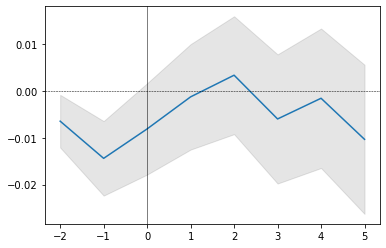

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-2,-0.006,0.004,-0.006,0.004,-1.460,0.144
-1,-0.008,0.004,-0.014 **,0.006,-2.311,0.021
0,0.006,0.004,-0.008,0.008,-1.060,0.289
1,0.007,0.004,-0.001,0.009,-0.139,0.889
2,0.005,0.004,0.003,0.010,0.346,0.729
3,-0.009,0.004,-0.006,0.011,-0.552,0.581
4,0.004,0.004,-0.002,0.012,-0.131,0.896
5,-0.009,0.004,-0.01,0.012,-0.829,0.407


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-2,-0.006,0.000,2.054,-0.641,-0.072,-0.013,-0.006,0.004,0.035
-1,-0.014,0.005,51.918,-6.875,-0.570,-0.022,-0.009,0.009,0.066
0,-0.008,0.001,1.603,0.176,-0.115,-0.025,-0.007,0.007,0.115
1,-0.001,0.002,8.564,1.742,-0.124,-0.028,-0.003,0.014,0.228
2,0.003,0.004,12.905,2.825,-0.147,-0.023,-0.005,0.016,0.353
3,-0.006,0.009,24.195,-3.042,-0.616,-0.025,-0.002,0.019,0.327
4,-0.002,0.003,11.653,1.918,-0.165,-0.023,-0.002,0.019,0.299
5,-0.010,0.003,1.218,-0.468,-0.175,-0.036,-0.005,0.023,0.118


DE110232=


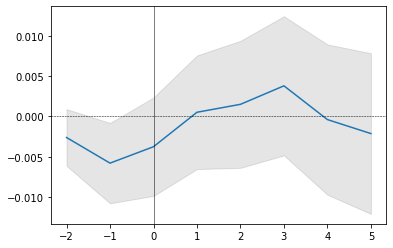

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-2,-0.003,0.003,-0.003,0.003,-0.949,0.343
-1,-0.003,0.003,-0.006,0.004,-1.488,0.137
0,0.002,0.003,-0.004,0.005,-0.787,0.431
1,0.004,0.003,0.001,0.005,0.095,0.924
2,0.001,0.003,0.002,0.006,0.245,0.806
3,0.002,0.003,0.004,0.007,0.565,0.572
4,-0.004,0.003,-0.0,0.007,-0.053,0.958
5,-0.002,0.003,-0.002,0.008,-0.272,0.785


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-2,-0.003,0.001,7.020,0.287,-0.112,-0.012,-0.003,0.008,0.122
-1,-0.006,0.002,5.806,-0.794,-0.187,-0.020,-0.008,0.012,0.122
0,-0.004,0.003,4.854,-1.056,-0.221,-0.021,-0.002,0.018,0.148
1,0.001,0.004,6.360,-1.310,-0.244,-0.017,0.002,0.025,0.168
2,0.002,0.005,6.264,-0.887,-0.281,-0.020,0.004,0.026,0.241
3,0.004,0.005,3.638,-0.441,-0.257,-0.023,-0.000,0.027,0.195
4,-0.000,0.004,4.436,-0.366,-0.248,-0.022,0.000,0.024,0.219
5,-0.002,0.005,3.676,0.309,-0.215,-0.028,-0.000,0.029,0.281


In [28]:
results_dfs2 = {}

for ticker, event in releases.items():
    print(ticker)
    event.plot()
    plt.show()
    display(event.results())
    display(event.get_CAR_dist())
    results_df2 = pd.DataFrame(event.results())
    results_dfs2[ticker] = results_df2
    event.to_excel(f'results_2{ticker}.xlsx')

In [39]:
with pd.ExcelWriter('combined_results2.xlsx') as writer:
    for ticker in tickers:
        xls = pd.ExcelFile(f'results_2{ticker}.xlsx')
        for sheet_name in xls.sheet_names:
            df = pd.read_excel(xls, sheet_name=sheet_name)
            df.to_excel(writer, sheet_name=f'{ticker}_{sheet_name}')  # unique name for each sheet
        xls.close()

In [40]:
import os
for ticker in tickers:
    os.remove(f'results_2{ticker}.xlsx')

In [41]:
connection = sqlite3.connect("Eventstudy.db")
cursor = connection.cursor()
engine = sqlalchemy.create_engine("sqlite:///Eventstudy.db")

for ticker, df in results_dfs2.items():
    df.to_sql(f'results2_{ticker}', engine, if_exists='replace')

###  3rd Event window (-2, +5) with estimation size = 100

In [42]:
releases = dict()

for ticker in tickers:
    events = [event for event in new_events_db if event['security_ticker'] == ticker]
    
    releases[ticker] = es.Multiple.from_list(
        events,
        es.Single.market_model,
        event_window=(-10, +3),
        estimation_size=200,
        buffer_size=25
    )

2023-06-11 14:17:16,223 P[13484] [MainThread 23088]  11 events have not been processed due to data issues.
Tips: Get more details on errors by calling Multiple.error_report() method or by exploring Multiple.errors class variable.
2023-06-11 14:17:16,247 P[13484] [MainThread 23088]  11 events have not been processed due to data issues.
Tips: Get more details on errors by calling Multiple.error_report() method or by exploring Multiple.errors class variable.
2023-06-11 14:17:16,270 P[13484] [MainThread 23088]  11 events have not been processed due to data issues.
Tips: Get more details on errors by calling Multiple.error_report() method or by exploring Multiple.errors class variable.
2023-06-11 14:17:16,294 P[13484] [MainThread 23088]  11 events have not been processed due to data issues.
Tips: Get more details on errors by calling Multiple.error_report() method or by exploring Multiple.errors class variable.
2023-06-11 14:17:16,318 P[13484] [MainThread 23088]  11 events have not been pro

In [43]:
for ticker, release in releases.items():
    print(f"Error report for ticker: {ticker}")
    print(release.error_report())
    print("\n")

Error report for ticker: US10YT=RR
Error Report

11 errors due to data unavailability.
The respective events was not processed and thus removed from the sample.
It does not affect the computation of other events.

Help 1: Check if the company was quoted at this date, 
Help 2: For event study modelised used Fama-French models,
        check if the Fama-French dataset imported is up-to-date.
Tips:   Re-import all parameters and re-run the event study analysis.

Details
(You can find more details on errors in the documentation.)

Error            Date                       Parameters                                     
---------------- -------------------------- -------------------------------------------------
DataMissingError 2013-09-18T00:00:00.000000 security_ticker: US10YT=RR; market_ticker: GOVT.K
Description: Some data are missing for (US10YT=RR) in 'returns''.

DataMissingError 2013-10-16T00:00:00.000000 security_ticker: US10YT=RR; market_ticker: GOVT.K
Description: Some data are

US10YT=RR


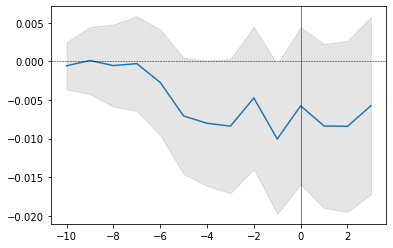

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-10,-0.001,0.002,-0.001,0.002,-0.233,0.815
-9,0.001,0.002,0.0,0.003,0.037,0.970
-8,-0.001,0.002,-0.001,0.004,-0.129,0.898
-7,0.000,0.002,-0.0,0.005,-0.059,0.953
-6,-0.002,0.002,-0.003,0.005,-0.506,0.613
-5,-0.004,0.002,-0.007,0.006,-1.203,0.229
-4,-0.001,0.002,-0.008,0.006,-1.264,0.206
-3,-0.000,0.002,-0.008,0.007,-1.237,0.216
-2,0.004,0.002,-0.005,0.007,-0.658,0.511
-1,-0.005,0.002,-0.01,0.008,-1.326,0.185


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-10,-0.001,0.000,0.599,0.417,-0.046,-0.013,-0.003,0.009,0.061
-9,0.000,0.000,2.655,-0.186,-0.084,-0.012,-0.003,0.011,0.066
-8,-0.001,0.001,1.232,0.141,-0.073,-0.015,-0.002,0.011,0.061
-7,-0.000,0.001,2.977,-0.074,-0.096,-0.013,-0.004,0.015,0.084
-6,-0.003,0.001,2.897,-0.527,-0.113,-0.019,-0.003,0.015,0.077
-5,-0.007,0.001,3.998,-1.139,-0.128,-0.023,-0.010,0.013,0.045
-4,-0.008,0.001,6.435,-1.361,-0.150,-0.025,-0.006,0.010,0.056
-3,-0.008,0.001,10.214,-2.055,-0.189,-0.024,-0.009,0.012,0.064
-2,-0.005,0.002,11.208,-2.132,-0.234,-0.026,-0.002,0.014,0.091
-1,-0.010,0.002,11.754,-2.354,-0.262,-0.032,-0.004,0.013,0.095


US2YT=RR


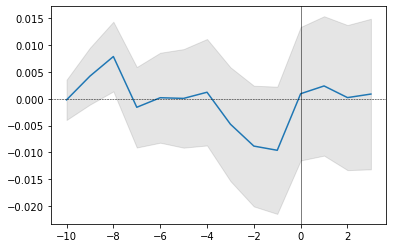

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-10,-0.000,0.003,-0.0,0.003,-0.068,0.946
-9,0.004,0.003,0.004,0.004,1.022,0.307
-8,0.004,0.003,0.008,0.005,1.554,0.120
-7,-0.009,0.003,-0.002,0.006,-0.270,0.787
-6,0.002,0.003,0.0,0.007,0.031,0.976
-5,-0.000,0.003,0.0,0.007,0.011,0.992
-4,0.001,0.003,0.001,0.008,0.158,0.874
-3,-0.006,0.003,-0.005,0.008,-0.572,0.567
-2,-0.004,0.003,-0.009,0.009,-1.004,0.315
-1,-0.001,0.003,-0.01,0.009,-1.037,0.300


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-10,-0.000,0.001,2.875,0.240,-0.083,-0.013,-0.002,0.014,0.098
-9,0.004,0.002,7.931,1.715,-0.090,-0.013,0.004,0.019,0.215
-8,0.008,0.007,40.675,5.921,-0.094,-0.018,-0.002,0.016,0.645
-7,-0.002,0.007,30.330,4.520,-0.172,-0.023,-0.002,0.021,0.562
-6,0.000,0.009,32.871,4.822,-0.188,-0.027,-0.000,0.025,0.650
-5,0.000,0.009,21.253,3.298,-0.250,-0.030,-0.001,0.025,0.597
-4,0.001,0.013,25.551,3.804,-0.281,-0.028,-0.003,0.028,0.751
-3,-0.005,0.014,20.215,2.600,-0.397,-0.033,-0.006,0.021,0.726
-2,-0.009,0.013,13.564,0.858,-0.501,-0.039,-0.011,0.021,0.582
-1,-0.010,0.016,12.125,1.381,-0.410,-0.044,-0.009,0.024,0.654


EU10YT=RR


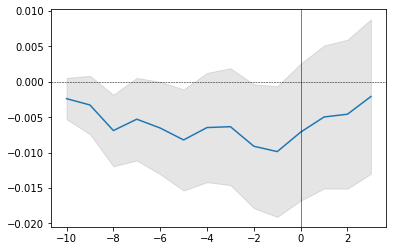

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-10,-0.002,0.002,-0.002,0.002,-1.049,0.294
-9,-0.001,0.002,-0.003,0.003,-1.019,0.308
-8,-0.004,0.002,-0.007 *,0.004,-1.749,0.080
-7,0.002,0.002,-0.005,0.005,-1.162,0.245
-6,-0.001,0.002,-0.007,0.005,-1.284,0.199
-5,-0.002,0.002,-0.008,0.006,-1.474,0.140
-4,0.002,0.002,-0.006,0.006,-1.074,0.283
-3,0.000,0.002,-0.006,0.006,-0.986,0.324
-2,-0.003,0.002,-0.009,0.007,-1.334,0.182
-1,-0.001,0.002,-0.01,0.007,-1.371,0.171


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-10,-0.002,0.000,3.465,-0.845,-0.077,-0.009,-0.001,0.007,0.046
-9,-0.003,0.001,5.140,0.499,-0.084,-0.013,-0.003,0.007,0.102
-8,-0.007,0.001,4.023,-1.027,-0.144,-0.019,-0.006,0.011,0.066
-7,-0.005,0.001,0.786,0.323,-0.083,-0.021,-0.007,0.014,0.100
-6,-0.007,0.001,1.602,-0.400,-0.138,-0.026,-0.003,0.012,0.070
-5,-0.008,0.001,1.842,-0.735,-0.138,-0.030,-0.004,0.014,0.083
-4,-0.006,0.002,1.251,-0.408,-0.143,-0.032,-0.001,0.014,0.097
-3,-0.006,0.002,0.612,-0.139,-0.130,-0.038,-0.004,0.020,0.124
-2,-0.009,0.002,0.711,-0.226,-0.119,-0.034,-0.004,0.014,0.125
-1,-0.010,0.002,0.229,-0.085,-0.128,-0.034,-0.010,0.017,0.113


EU2YT=RR


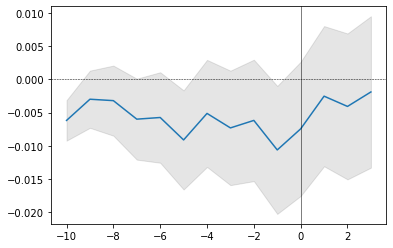

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-10,-0.006,0.002,-0.006 **,0.002,-2.592,0.010
-9,0.003,0.002,-0.003,0.003,-0.884,0.377
-8,-0.000,0.002,-0.003,0.004,-0.773,0.440
-7,-0.003,0.002,-0.006,0.005,-1.256,0.209
-6,0.000,0.002,-0.006,0.005,-1.076,0.282
-5,-0.003,0.002,-0.009,0.006,-1.563,0.118
-4,0.004,0.002,-0.005,0.006,-0.812,0.417
-3,-0.002,0.002,-0.007,0.007,-1.084,0.278
-2,0.001,0.002,-0.006,0.007,-0.864,0.388
-1,-0.004,0.002,-0.011,0.008,-1.411,0.158


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-10,-0.006,0.001,10.296,-2.462,-0.142,-0.010,-0.003,0.003,0.068
-9,-0.003,0.002,5.626,0.154,-0.161,-0.015,0.001,0.009,0.159
-8,-0.003,0.003,27.281,3.952,-0.144,-0.016,-0.002,0.012,0.386
-7,-0.006,0.003,15.744,2.063,-0.178,-0.019,-0.004,0.011,0.305
-6,-0.006,0.008,32.688,4.634,-0.225,-0.027,-0.006,0.013,0.601
-5,-0.009,0.008,17.854,2.324,-0.301,-0.024,-0.002,0.016,0.515
-4,-0.005,0.009,16.741,2.237,-0.308,-0.024,0.001,0.021,0.555
-3,-0.007,0.011,20.010,2.619,-0.341,-0.038,-0.002,0.019,0.644
-2,-0.006,0.009,12.980,1.376,-0.339,-0.028,-0.001,0.021,0.517
-1,-0.011,0.009,10.483,0.365,-0.416,-0.036,-0.006,0.023,0.455


CH10YT=RR


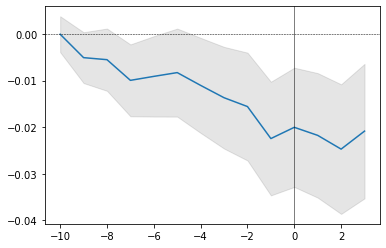

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-10,-0.000,0.003,-0.0,0.003,-0.017,0.986
-9,-0.005,0.003,-0.005,0.004,-1.193,0.233
-8,-0.000,0.003,-0.006,0.005,-1.058,0.290
-7,-0.004,0.003,-0.01 *,0.006,-1.653,0.098
-6,0.001,0.003,-0.009,0.007,-1.352,0.176
-5,0.001,0.003,-0.008,0.007,-1.124,0.261
-4,-0.003,0.003,-0.011,0.008,-1.386,0.166
-3,-0.003,0.003,-0.014,0.009,-1.607,0.108
-2,-0.002,0.003,-0.016 *,0.009,-1.725,0.085
-1,-0.007,0.003,-0.022 **,0.010,-2.358,0.018


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-10,-0.000,0.000,0.252,0.410,-0.045,-0.014,-0.001,0.011,0.059
-9,-0.005,0.001,0.289,-0.013,-0.079,-0.020,-0.007,0.011,0.057
-8,-0.006,0.002,0.286,0.242,-0.099,-0.028,-0.007,0.015,0.105
-7,-0.010,0.002,-0.427,-0.069,-0.110,-0.033,-0.009,0.008,0.081
-6,-0.009,0.003,3.912,0.991,-0.131,-0.049,-0.007,0.025,0.235
-5,-0.008,0.005,8.340,1.650,-0.160,-0.042,-0.011,0.022,0.341
-4,-0.011,0.005,4.807,1.204,-0.167,-0.056,-0.013,0.027,0.319
-3,-0.014,0.005,5.371,1.221,-0.175,-0.059,-0.012,0.023,0.326
-2,-0.016,0.006,6.538,1.366,-0.202,-0.056,-0.015,0.023,0.347
-1,-0.022,0.004,0.766,-0.318,-0.203,-0.056,-0.025,0.019,0.161


CH2YT=RR


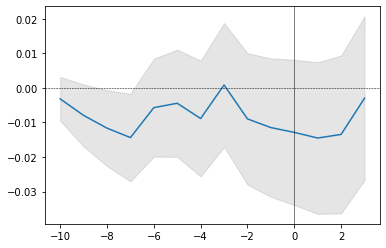

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-10,-0.003,0.005,-0.003,0.005,-0.640,0.522
-9,-0.005,0.005,-0.008,0.007,-1.136,0.256
-8,-0.004,0.005,-0.012,0.009,-1.358,0.174
-7,-0.003,0.005,-0.014,0.010,-1.453,0.146
-6,0.009,0.005,-0.006,0.011,-0.516,0.606
-5,0.001,0.005,-0.004,0.012,-0.366,0.714
-4,-0.004,0.005,-0.009,0.013,-0.677,0.498
-3,0.010,0.005,0.001,0.014,0.060,0.952
-2,-0.010,0.005,-0.009,0.015,-0.604,0.546
-1,-0.003,0.005,-0.011,0.016,-0.734,0.463


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-10,-0.003,0.002,2.736,0.425,-0.144,-0.023,0.002,0.015,0.152
-9,-0.008,0.003,2.339,-0.629,-0.186,-0.028,-0.003,0.014,0.150
-8,-0.012,0.008,8.386,-1.269,-0.433,-0.023,0.002,0.016,0.306
-7,-0.014,0.005,2.274,-0.258,-0.216,-0.037,-0.008,0.011,0.215
-6,-0.006,0.013,10.597,2.364,-0.265,-0.041,-0.007,0.015,0.560
-5,-0.004,0.016,9.407,2.259,-0.260,-0.045,-0.009,0.025,0.578
-4,-0.009,0.021,8.095,1.602,-0.414,-0.052,-0.004,0.026,0.660
-3,0.001,0.034,14.133,3.135,-0.395,-0.055,-0.010,0.023,0.903
-2,-0.009,0.019,10.981,2.040,-0.392,-0.069,-0.006,0.028,0.727
-1,-0.011,0.012,3.292,0.947,-0.286,-0.063,-0.011,0.024,0.368


NL41881=


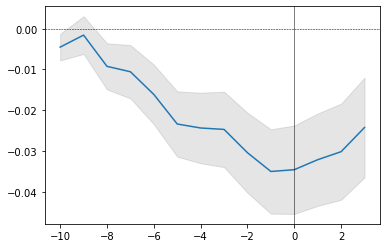

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-10,-0.005,0.003,-0.005 *,0.003,-1.765,0.078
-9,0.003,0.003,-0.002,0.004,-0.431,0.666
-8,-0.008,0.003,-0.009 **,0.004,-2.086,0.037
-7,-0.001,0.003,-0.011 **,0.005,-2.066,0.039
-6,-0.006,0.003,-0.016 ***,0.006,-2.823,0.005
-5,-0.007,0.003,-0.023 ***,0.006,-3.737,0.000
-4,-0.001,0.003,-0.024 ***,0.007,-3.605,0.000
-3,-0.000,0.003,-0.025 ***,0.007,-3.420,0.001
-2,-0.006,0.003,-0.03 ***,0.008,-3.972,0.000
-1,-0.005,0.003,-0.035 ***,0.008,-4.338,0.000


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-10,-0.005,0.001,4.585,-0.439,-0.113,-0.015,-0.003,0.006,0.090
-9,-0.002,0.002,4.891,-0.080,-0.178,-0.015,-0.004,0.012,0.158
-8,-0.009,0.002,9.630,-1.673,-0.247,-0.023,-0.001,0.011,0.153
-7,-0.011,0.003,11.298,-1.712,-0.286,-0.023,-0.004,0.011,0.172
-6,-0.016,0.003,12.091,-2.769,-0.328,-0.028,-0.006,0.010,0.065
-5,-0.023,0.006,12.777,-3.128,-0.440,-0.035,-0.006,0.012,0.099
-4,-0.024,0.007,12.027,-3.086,-0.471,-0.029,-0.007,0.011,0.094
-3,-0.025,0.008,11.038,-2.755,-0.492,-0.038,-0.007,0.014,0.175
-2,-0.030,0.011,14.701,-3.487,-0.605,-0.038,-0.013,0.018,0.101
-1,-0.035,0.013,15.707,-3.668,-0.667,-0.042,-0.012,0.018,0.110


LU0945626439=


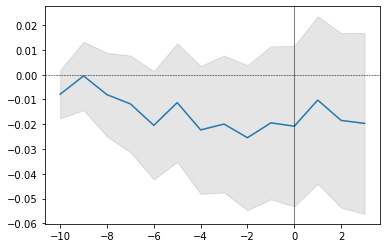

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-10,-0.008,0.008,-0.008,0.008,-1.033,0.302
-9,0.007,0.008,-0.0,0.011,-0.043,0.965
-8,-0.008,0.008,-0.008,0.013,-0.610,0.542
-7,-0.004,0.008,-0.012,0.015,-0.772,0.440
-6,-0.009,0.008,-0.02,0.017,-1.198,0.231
-5,0.009,0.008,-0.011,0.019,-0.602,0.547
-4,-0.011,0.008,-0.022,0.020,-1.104,0.270
-3,0.002,0.008,-0.02,0.022,-0.924,0.356
-2,-0.006,0.008,-0.025,0.023,-1.112,0.266
-1,0.006,0.008,-0.019,0.024,-0.805,0.421


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-10,-0.008,0.002,0.974,-0.065,-0.115,-0.021,-0.005,0.009,0.110
-9,-0.000,0.002,2.361,0.083,-0.172,-0.024,-0.000,0.019,0.137
-8,-0.008,0.003,0.924,0.084,-0.145,-0.030,-0.002,0.013,0.137
-7,-0.012,0.004,2.303,0.005,-0.209,-0.035,-0.007,0.011,0.189
-6,-0.020,0.005,4.482,-1.543,-0.325,-0.050,-0.004,0.022,0.132
-5,-0.011,0.006,1.600,-0.427,-0.254,-0.048,-0.001,0.024,0.210
-4,-0.022,0.006,2.166,-1.062,-0.283,-0.050,-0.010,0.020,0.130
-3,-0.020,0.007,3.938,-1.375,-0.338,-0.051,-0.013,0.027,0.150
-2,-0.025,0.008,9.328,-2.296,-0.498,-0.063,-0.015,0.024,0.116
-1,-0.019,0.009,4.092,-1.181,-0.382,-0.061,-0.010,0.025,0.213


BE328=


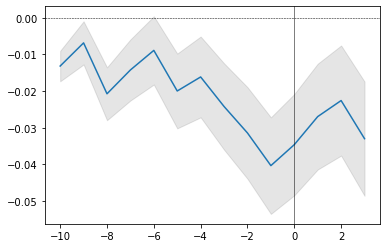

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-10,-0.013,0.003,-0.013 ***,0.003,-4.047,0.000
-9,0.006,0.003,-0.007,0.005,-1.488,0.137
-8,-0.014,0.003,-0.021 ***,0.006,-3.681,0.000
-7,0.007,0.003,-0.014 **,0.007,-2.188,0.029
-6,0.005,0.003,-0.009,0.007,-1.222,0.222
-5,-0.011,0.003,-0.02 **,0.008,-2.507,0.012
-4,0.004,0.003,-0.016 *,0.009,-1.875,0.061
-3,-0.008,0.003,-0.024 ***,0.009,-2.631,0.009
-2,-0.007,0.003,-0.031 ***,0.010,-3.221,0.001
-1,-0.009,0.003,-0.04 ***,0.010,-3.922,0.000


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-10,-0.013,0.005,42.159,-6.100,-0.535,-0.012,-0.004,0.006,0.090
-9,-0.007,0.002,8.266,-2.411,-0.209,-0.014,0.001,0.012,0.071
-8,-0.021,0.010,34.823,-5.561,-0.723,-0.019,-0.003,0.013,0.058
-7,-0.014,0.003,15.385,-3.269,-0.319,-0.025,-0.006,0.012,0.060
-6,-0.009,0.004,7.190,-0.271,-0.254,-0.024,-0.003,0.015,0.241
-5,-0.020,0.004,5.637,-1.996,-0.299,-0.042,-0.005,0.015,0.086
-4,-0.016,0.007,9.151,-1.840,-0.421,-0.029,-0.001,0.020,0.259
-3,-0.024,0.006,9.683,-2.748,-0.421,-0.036,-0.006,0.010,0.103
-2,-0.031,0.008,8.865,-2.794,-0.438,-0.049,-0.011,0.010,0.079
-1,-0.040,0.011,8.713,-2.823,-0.485,-0.054,-0.017,0.015,0.074


DE110232=


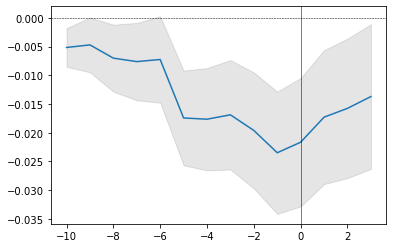

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
-10,-0.005,0.003,-0.005 *,0.003,-1.960,0.050
-9,0.000,0.003,-0.005,0.004,-1.265,0.206
-8,-0.002,0.003,-0.007,0.005,-1.540,0.124
-7,-0.001,0.003,-0.008,0.005,-1.448,0.148
-6,0.000,0.003,-0.007,0.006,-1.233,0.218
-5,-0.010,0.003,-0.017 ***,0.006,-2.707,0.007
-4,-0.000,0.003,-0.018 **,0.007,-2.537,0.011
-3,0.001,0.003,-0.017 **,0.007,-2.271,0.023
-2,-0.003,0.003,-0.02 **,0.008,-2.486,0.013
-1,-0.004,0.003,-0.023 ***,0.008,-2.826,0.005


,Mean,Variance,Kurtosis,Skewness,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-10,-0.005,0.001,10.939,-2.383,-0.159,-0.013,-0.002,0.007,0.065
-9,-0.005,0.002,12.195,-2.334,-0.261,-0.015,-0.004,0.013,0.117
-8,-0.007,0.003,12.485,-2.151,-0.287,-0.021,-0.001,0.014,0.156
-7,-0.008,0.003,12.523,-1.323,-0.312,-0.023,-0.004,0.011,0.212
-6,-0.007,0.007,18.457,2.509,-0.284,-0.035,-0.004,0.012,0.506
-5,-0.017,0.008,10.773,0.625,-0.333,-0.044,-0.009,0.012,0.427
-4,-0.018,0.008,6.702,-0.872,-0.387,-0.048,-0.012,0.019,0.314
-3,-0.017,0.011,10.526,-0.980,-0.528,-0.053,-0.007,0.023,0.404
-2,-0.020,0.012,8.805,-1.398,-0.563,-0.049,-0.014,0.021,0.322
-1,-0.023,0.013,13.789,-2.349,-0.670,-0.064,-0.014,0.020,0.260


In [44]:
results_dfs3 = {}

for ticker, event in releases.items():
    print(ticker)
    event.plot()
    plt.show()
    display(event.results())
    display(event.get_CAR_dist())
    results_df3 = pd.DataFrame(event.results())
    results_dfs3[ticker] = results_df3
    event.to_excel(f'results_3{ticker}.xlsx')

In [45]:
with pd.ExcelWriter('combined_results3.xlsx') as writer:
    for ticker in tickers:
        xls = pd.ExcelFile(f'results_3{ticker}.xlsx')
        for sheet_name in xls.sheet_names:
            df = pd.read_excel(xls, sheet_name=sheet_name)
            df.to_excel(writer, sheet_name=f'{ticker}_{sheet_name}')  # unique name for each sheet
        xls.close()

In [46]:
import os
for ticker in tickers:
    os.remove(f'results_3{ticker}.xlsx')

In [47]:
connection = sqlite3.connect("Eventstudy.db")
cursor = connection.cursor()
engine = sqlalchemy.create_engine("sqlite:///Eventstudy.db")

for ticker, df in results_dfs3.items():
    df.to_sql(f'results3_{ticker}', engine, if_exists='replace')